## **Open Power System Data – OPSD Time-Series Dataset**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DATASET_PATH = 'data/2.2-ex-opsd_germany_daily.csv'

df = pd.read_csv(DATASET_PATH)
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
df['Date']  = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Year']  = df.index.year
df['Month'] = df.index.month
df['Day']   = df.index.day

## **Time-based Indexing**

In [5]:
df.loc['2006-01':'2006-01':5]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1
2006-01-06,1403.427,NaN,NaN,NaN,2006,1,6
2006-01-11,1577.176,NaN,NaN,NaN,2006,1,11
2006-01-16,1563.738,NaN,NaN,NaN,2006,1,16
2006-01-21,1348.188,NaN,NaN,NaN,2006,1,21
2006-01-26,1601.673,NaN,NaN,NaN,2006,1,26
2006-01-31,1575.129,NaN,NaN,NaN,2006,1,31


## **Visualization**

In [6]:
sns.set(rc={'figure.figsize': (10, 4)})

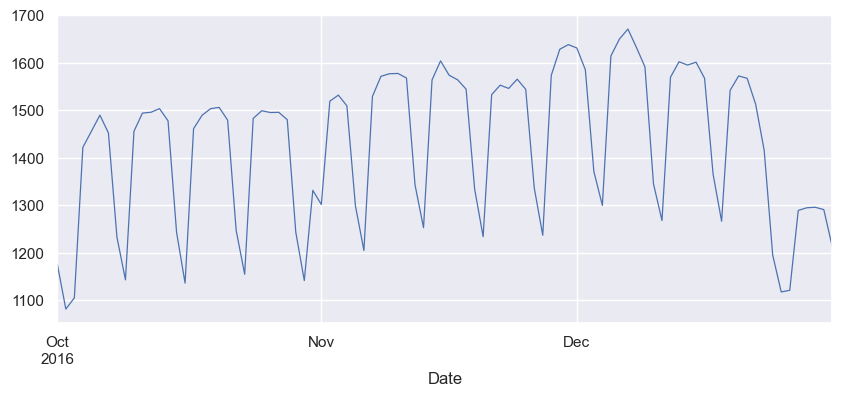

In [7]:
df.loc['2016-10':'2016-12', 'Consumption'].plot(linewidth=0.9);

## **Seasonality**

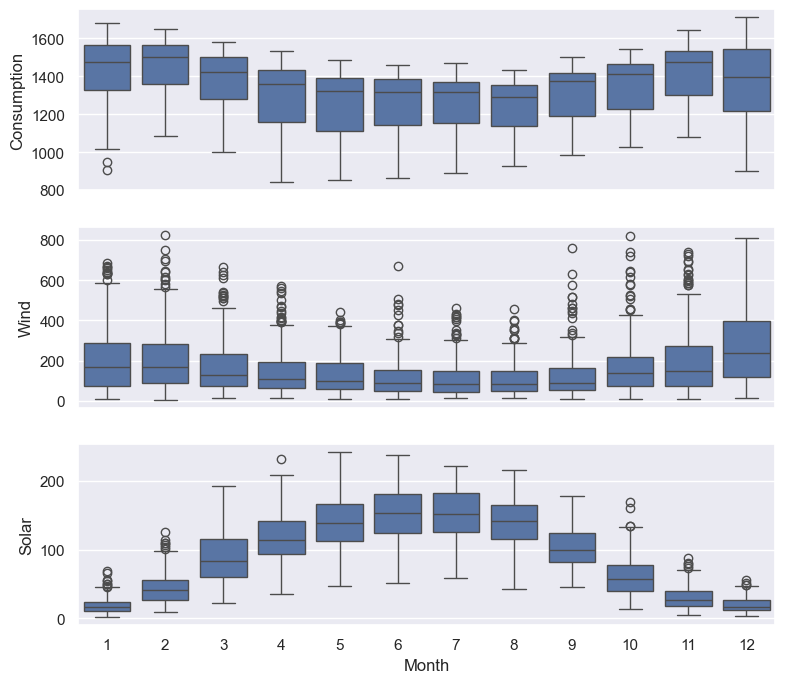

In [8]:
_, axes = plt.subplots(3, 1, figsize=(9, 8), sharex=True)

for name, ax in zip(['Consumption', 'Wind', 'Solar'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)

## **Frequencies**

In [9]:
pd.date_range('2024-08-25', '2024-08-30', freq='D')

DatetimeIndex(['2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range('2024-08-25', periods=10, freq='h')

DatetimeIndex(['2024-08-25 00:00:00', '2024-08-25 01:00:00',
               '2024-08-25 02:00:00', '2024-08-25 03:00:00',
               '2024-08-25 04:00:00', '2024-08-25 05:00:00',
               '2024-08-25 06:00:00', '2024-08-25 07:00:00',
               '2024-08-25 08:00:00', '2024-08-25 09:00:00'],
              dtype='datetime64[ns]', freq='h')

## **Resampling**

In [11]:
time_sample = pd.to_datetime(['2014-02-02', '2014-02-05', '2014-02-08'])
time_sample

DatetimeIndex(['2014-02-02', '2014-02-05', '2014-02-08'], dtype='datetime64[ns]', freq=None)

In [12]:
consump_sample = df.loc[time_sample, ['Consumption']].copy()
consump_sample

,Consumption
2014-02-02,1265.416
2014-02-05,1623.241
2014-02-08,1365.813


In [13]:
consump_sample.asfreq('D')

,Consumption
2014-02-02,1265.416
2014-02-03,NaN
2014-02-04,NaN
2014-02-05,1623.241
2014-02-06,NaN
2014-02-07,NaN
2014-02-08,1365.813


In [14]:
consump_sample.asfreq('D', method='ffill')

,Consumption
2014-02-02,1265.416
2014-02-03,1265.416
2014-02-04,1265.416
2014-02-05,1623.241
2014-02-06,1623.241
2014-02-07,1623.241
2014-02-08,1365.813


In [15]:
# Down sampling
df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].resample('YE').mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,1339.913797,NaN,NaN,NaN
2007-12-31,1360.635197,NaN,NaN,NaN
2008-12-31,1354.018787,NaN,NaN,NaN
2009-12-31,1259.554597,NaN,NaN,NaN
2010-12-31,1338.599178,98.388430,NaN,NaN
2011-12-31,1328.257770,120.969646,NaN,NaN
2012-12-31,1282.991131,125.307833,76.194896,201.502730
2013-12-31,1269.416036,129.309129,81.431901,211.287722
2014-12-31,1381.273482,140.405692,89.527017,230.305254


## **Rolling Windows**

In [16]:
df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].rolling(window=7, center=True).mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1208.214129,617.734286,17.807143,635.541429
2017-12-28,1203.265211,604.699143,19.240143,623.939286
2017-12-29,NaN,NaN,NaN,NaN


## **Trends**

In [17]:
df_7d = df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].rolling(window=7, center=True).mean()
df_365d = df[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].rolling(window=365, center=True, min_periods=360).mean()

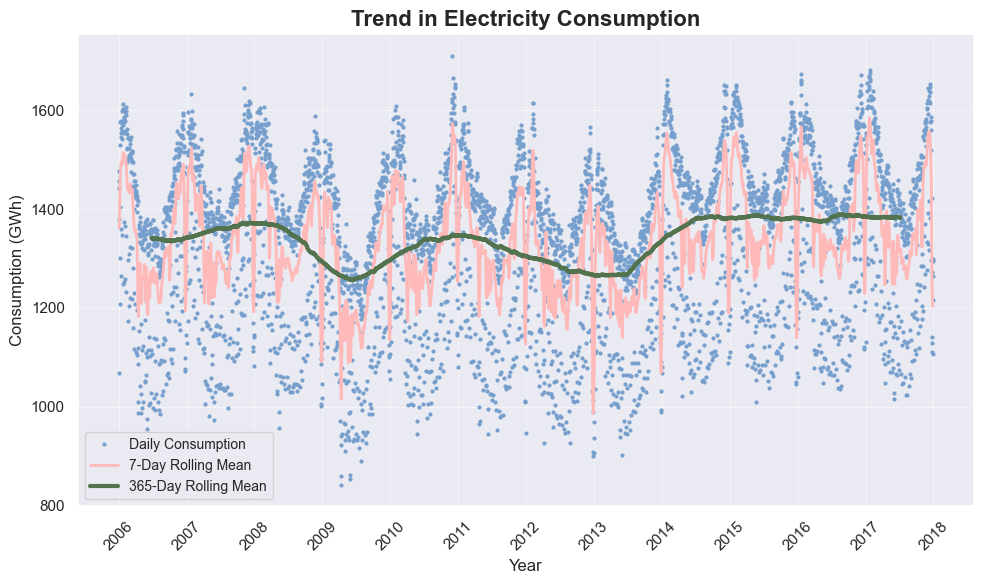

In [18]:
_, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['Consumption'], marker='o', markersize=2, color='#769FCD', linestyle='None', label='Daily Consumption')
ax.plot(df_7d['Consumption'], linewidth=2, color='#FFB9B9', label='7-Day Rolling Mean')
ax.plot(df_365d['Consumption'], linewidth=3, color='#52734D', label='365-Day Rolling Mean')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.set_title('Trend in Electricity Consumption', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Consumption (GWh)', fontsize=12)

ax.legend(fontsize=10)

plt.tight_layout()
plt.show()